**Importing Libraries and Reading Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/IIT Guwahati Hackathon'25/Dev_data.csv"
data = pd.read_csv(data_path)

Mounted at /content/drive


**Data Visualisation**

In [ ]:
data['bad_flag'].value_counts()

,count
bad_flag,
0,95434
1,1372


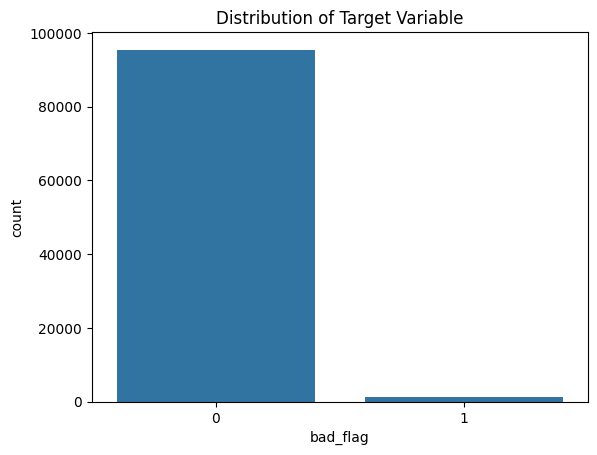

In [ ]:
import seaborn as sns
sns.countplot(x='bad_flag', data=data)
plt.title('Distribution of Target Variable')
plt.show()

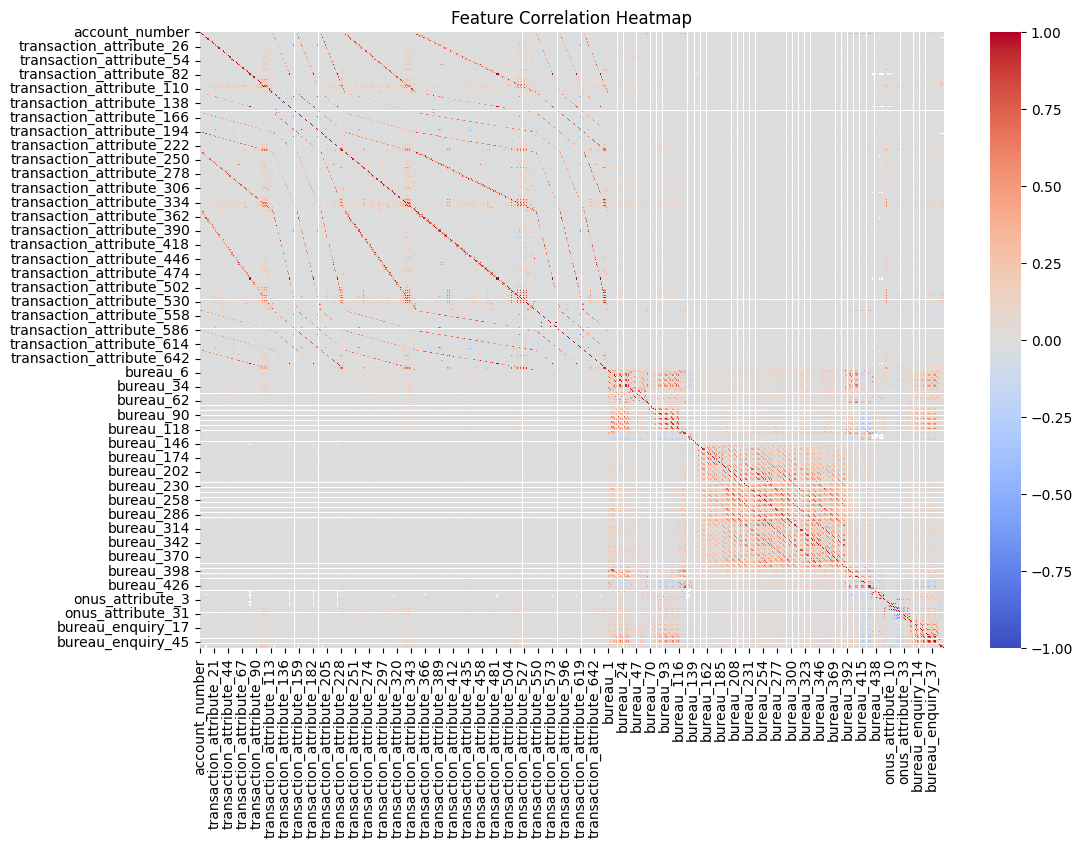

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Data Preprocessing**

In [ ]:
data.set_index('account_number',inplace=True)

In [ ]:
data = data.loc[:, data.isna().sum() < 9000]

# Replace remaining NaN values with the mode of each respective column
data = data.apply(lambda col: col.fillna(col.mode()[0]), axis=0)

In [ ]:
data.shape

(96806, 520)

In [ ]:
# Split the data as per instructions
bad_flag_0 = data[data['bad_flag'] == 0]
bad_flag_1 = data[data['bad_flag'] == 1]

total_rows_bad_flag_0 = len(bad_flag_0)
size_bad_flag_0_half2 = int(0.1* total_rows_bad_flag_0)

bad_flag_0_half2 = bad_flag_0.iloc[:size_bad_flag_0_half2]
bad_flag_0_half1 = bad_flag_0.iloc[size_bad_flag_0_half2:size_bad_flag_0_half2 + 2000]

bad_flag_1_half1 = bad_flag_1.iloc[:int(bad_flag_1.shape[0]*0.3)]
bad_flag_1_half2 = bad_flag_1.iloc[int(bad_flag_1.shape[0]*0.3):]

test_data = pd.concat([bad_flag_0_half1, bad_flag_1_half1])

# Increasing the number of data with bad_flag as 1
bad_flag_1_train = pd.concat([bad_flag_1_half2] * 2)
train_data = pd.concat([bad_flag_0_half2, bad_flag_1_train])

train_data.sample(frac=1, random_state=42).reset_index(drop=True)

,bad_flag,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,bureau_9,...,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0
1,0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,20.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,8.0,...,28.0,1.0,27.0,0.0,7.0,0.0,0.0,1.0,0.0,17.0
3,1,0.0,10.0,0.0,0.0,1.0,1.0,7.0,2.0,20.0,...,18.0,0.0,18.0,0.0,6.0,0.0,0.0,0.0,0.0,10.0
4,0,2.0,3.0,1.0,0.0,2.0,2.0,5.0,10.0,16.0,...,12.0,3.0,9.0,0.0,3.0,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,...,3.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11461,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11462,0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,9.0,...,4.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
11463,0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Train data set:")
print(train_data['bad_flag'].value_counts())
print()
print("Test data set:")
print(test_data['bad_flag'].value_counts())

Train data set:
bad_flag
0    9543
1    1922
Name: count, dtype: int64

Test data set:
bad_flag
0    2000
1     411
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_train=train_data['bad_flag']
y_test=test_data['bad_flag']
train_data.drop(columns=['bad_flag'])
test_data.drop(columns=['bad_flag'])
scaler=MinMaxScaler()
train_data_scaled=scaler.fit_transform(train_data)
test_data_scaled=scaler.transform(test_data)

train_data['bad_flag']

,bad_flag
account_number,
1,0
2,0
3,0
4,0
5,0
...,...
96423,1
96425,1
96523,1


In [ ]:
X_train = train_data.drop(columns=['bad_flag'])
X_test = test_data.drop(columns=['bad_flag'])


# Convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

**Finding the best hyper-parameters & Training XGBoost**

In [ ]:
import itertools
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))

# Initialize variables to store the best parameters and score
best_params = None
best_auc = 0

print(f"Total parameter combinations to evaluate: {len(param_combinations)}")

# Perform grid search
for idx, param_set in enumerate(param_combinations):
    params = dict(zip(param_grid.keys(), param_set))
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'auc'
    params['seed'] = 42

    print(f"Evaluating combination {idx + 1}/{len(param_combinations)}: {params}")

    # Train the model
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=500,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=False
    )

    # Get the best score for the validation set
    best_score = model.best_score

    # Update the best parameters if the current score is better
    if best_score > best_auc:
        best_auc = best_score
        best_params = params
        print(f"New best AUC: {best_auc:.4f} with params: {best_params}")

print("\nBest Parameters Found:")
print(best_params)

Total parameter combinations to evaluate: 324
Evaluating combination 1/324: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}
New best AUC: 0.8034 with params: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}
Evaluating combination 2/324: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1.5, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}
Evaluating combination 3/324: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 2, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}
New best AUC: 0.8036 with params: {'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.8, 'colsamp

In [ ]:
best_params = {'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}

**Train Model**

In [ ]:
# Train the final model with the best parameters
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=10,
    verbose_eval=50
)

print("Final model training with tuned parameters completed.")

[0]	train-auc:0.73937	eval-auc:0.71323
[50]	train-auc:0.84559	eval-auc:0.80656
[83]	train-auc:0.86222	eval-auc:0.81059
Final model training with tuned parameters completed.


**Evaluating the model**

In [ ]:
y_pred_prob = final_model.predict(dtest)


Final Model Performance:
AUC Score: 0.8103990267639902
F1 Score: 0.2414486921529175
Accuracy: 0.8436333471588553

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2000
           1       0.70      0.15      0.24       411

    accuracy                           0.84      2411
   macro avg       0.77      0.57      0.58      2411
weighted avg       0.82      0.84      0.80      2411


Top 10 Most Important Features:
               feature  importance
98   onus_attribute_26  241.789490
90    onus_attribute_2  127.154243
122  bureau_enquiry_35   88.529594
89          bureau_452   79.989067
27          bureau_108   66.803802
95   onus_attribute_17   66.324295
102  onus_attribute_31   63.170845
46          bureau_237   61.543491
100  onus_attribute_29   56.856792
41          bureau_197   56.529705


<Figure size 1000x600 with 0 Axes>

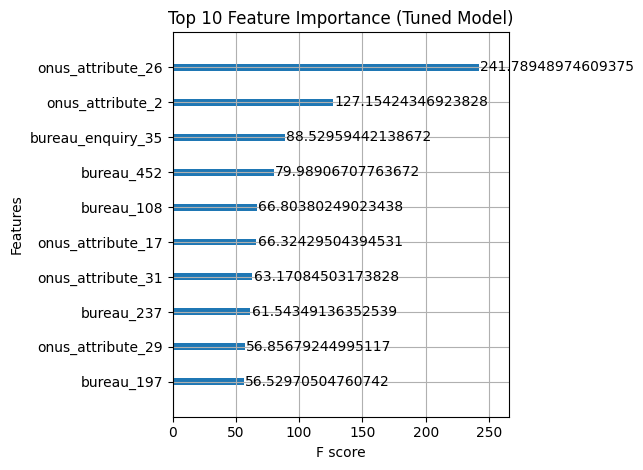

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# Evaluate final model
# Get predicted probabilities for the positive class
y_pred_prob = final_model.predict(dtest)

# Convert probabilities to binary predictions using a threshold of 0.5
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Print performance metrics
print("\nFinal Model Performance:")
print("AUC Score:", roc_auc_score(y_test, y_pred_prob))  # Using probabilities
print("F1 Score:", f1_score(y_test, y_pred))  # Using binary predictions
print("Accuracy:", accuracy_score(y_test, y_pred))  # Using binary predictions
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Full classification report

# Feature importance
importance_scores = final_model.get_score(importance_type='gain')
feature_importance = pd.DataFrame({
    'feature': list(importance_scores.keys()),
    'importance': list(importance_scores.values())
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importance (Tuned Model)')
plt.tight_layout()
plt.show()

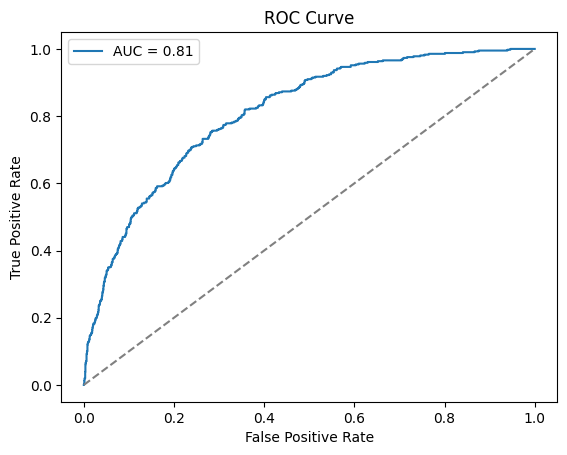

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Finding mean absolute error**

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on training and testing data
train_predictions = final_model.predict(dtrain, iteration_range=(0, final_model.best_iteration))
test_predictions = final_model.predict(dtest, iteration_range=(0, final_model.best_iteration))

# Calculate Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Output MAE for both training and testing
print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {test_mae}')

Training MAE: 0.22256407141685486
Testing MAE: 0.2346525341272354


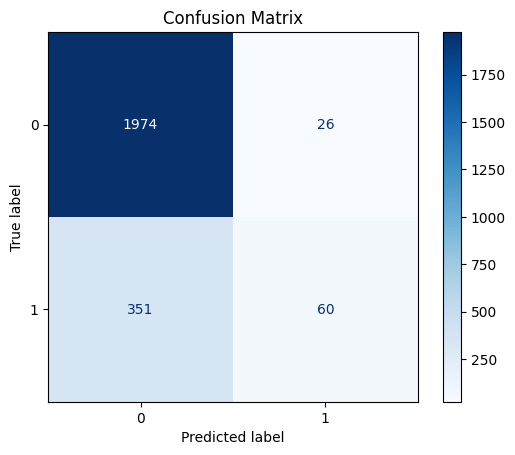

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Finding Probabilities for the given validation data**

In [ ]:
val_data_path = "/content/drive/MyDrive/Colab Notebooks/IIT Guwahati Hackathon'25/validation_data.csv"
val_data = pd.read_csv(val_data_path)

In [ ]:
final_cols = X_train.columns
print(final_cols)

Index(['bureau_1', 'bureau_2', 'bureau_3', 'bureau_4', 'bureau_5', 'bureau_6',
       'bureau_7', 'bureau_8', 'bureau_9', 'bureau_10',
       ...
       'bureau_enquiry_41', 'bureau_enquiry_42', 'bureau_enquiry_43',
       'bureau_enquiry_44', 'bureau_enquiry_45', 'bureau_enquiry_46',
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50'],
      dtype='object', length=519)


In [ ]:
keys = val_data.iloc[:, 0]  # First column as keys
features = val_data[final_cols]  # Needed features

In [ ]:
features.shape

(41792, 519)

In [ ]:
features = features.apply(lambda col: col.fillna(col.mode()[0]), axis=0)

In [ ]:
features

,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,bureau_9,bureau_10,...,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,11.0,0.0,...,51.0,1.0,50.0,0.0,10.0,0.0,0.0,0.0,0.0,32.0
1,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.0,0.0,0.0,0.0,0.0,16.0,3.0,31.0,3.0,...,16.0,2.0,14.0,0.0,1.0,0.0,0.0,2.0,0.0,12.0
3,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,21.0,0.0,...,29.0,0.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41787,2.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,5.0,3.0,...,12.0,2.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
41788,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0,...,24.0,1.0,23.0,0.0,2.0,0.0,0.0,1.0,0.0,19.0
41789,0.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0,20.0,1.0,...,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
41790,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
dval = xgb.DMatrix(features)

In [ ]:
predictions = final_model.predict(dval)

# Create a new DataFrame with keys and predictions
output_data = pd.DataFrame({
    "Key": keys,
    "Prediction": predictions
})

In [ ]:
# Save the new DataFrame to a CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/IIT Guwahati Hackathon'25/Data_for_submission.csv"
output_data.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to /content/drive/MyDrive/Colab Notebooks/IIT Guwahati Hackathon'25/Data_for_submission.csv
